In [28]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib import cm
from mpl_toolkits import mplot3d

In [8]:
A_w = 2
B_w = 2
K = 100
GRANULARITY = 100

$p(\theta, \omega) = p(\theta|\omega)p(\omega)$

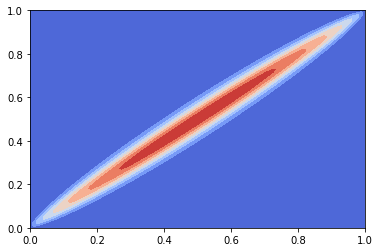

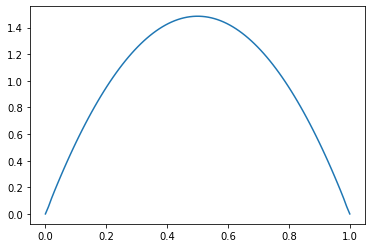

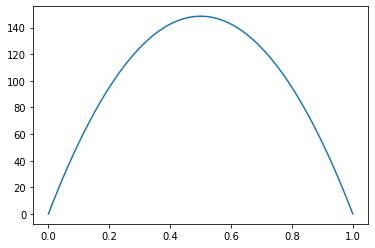

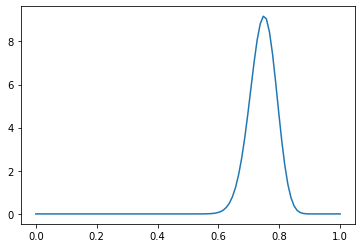

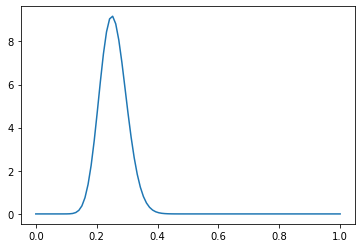

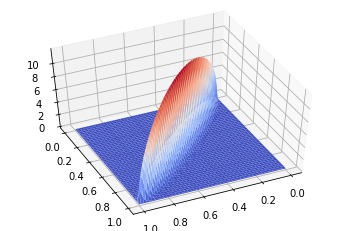

In [37]:
theta = np.linspace(0, 1, GRANULARITY)
omega = np.linspace(0, 1, GRANULARITY)
THETA, OMEGA = np.meshgrid(theta, omega)
prior = np.multiply(beta.pdf(THETA, OMEGA * (K - 2) + 1, (1 - OMEGA) * (K - 2) + 1), beta.pdf(OMEGA, A_w, B_w))
fig, ax = plt.subplots()
ax.contourf(THETA, OMEGA, prior, cmap = cm.coolwarm)
marginal_theta = np.sum(prior, axis = 1) / prior.shape[0]
marginal_omega = np.sum(prior, axis = 0)
fig, ax = plt.subplots()
ax.plot(theta, marginal_theta)
fig, ax = plt.subplots()
ax.plot(omega, marginal_omega)
# p(\theta|\omega = 0.75)
fig, ax = plt.subplots()
ax.plot(theta, beta.pdf(theta, 0.75 * (K - 2) + 1, (1 - 0.75) * (K - 2) + 1))
# p(\theta|\omega = 0.25)
fig, ax = plt.subplots()
ax.plot(theta, beta.pdf(theta, 0.25 * (K - 2) + 1, (1 - 0.25) * (K - 2) + 1))
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(THETA, OMEGA, prior, cmap = cm.coolwarm, edgecolor = 'none')
ax.view_init(50, 65)

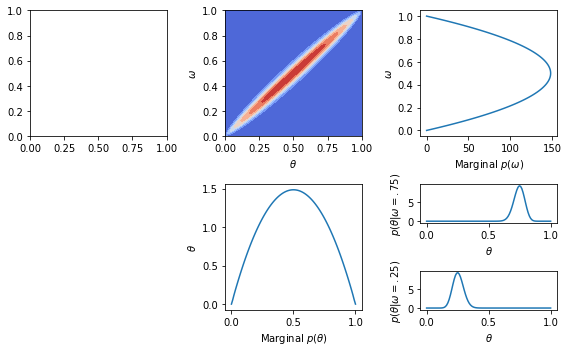

In [83]:
fig = plt.figure(constrained_layout = False)
gs = fig.add_gridspec(4, 3)
ax1 = fig.add_subplot(gs[0:2, 0])

ax2 = fig.add_subplot(gs[0:2, 1])
ax2.contourf(THETA, OMEGA, prior, cmap = cm.coolwarm)
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel(r'$\omega$')
 
ax3 = fig.add_subplot(gs[0:2, 2])
ax3.plot(marginal_omega, omega)
ax3.set_xlabel(r'Marginal $p(\omega)$')
ax3.set_ylabel(r'$\omega$')

ax4 = fig.add_subplot(gs[2:4, 1])
ax4.plot(theta, marginal_theta)
ax4.set_ylabel(r'$\theta$')
ax4.set_xlabel(r'Marginal $p(\theta)$')

ax5 = fig.add_subplot(gs[2, 2])
ax5.plot(theta, beta.pdf(theta, 0.75 * (K - 2) + 1, (1 - 0.75) * (K - 2) + 1))
ax5.set_xlabel(r'$\theta$')
ax5.set_ylabel(r'$p(\theta|\omega=.75)$')

ax6 = fig.add_subplot(gs[3, 2])
ax6.plot(theta, beta.pdf(theta, 0.25 * (K - 2) + 1, (1 - 0.25) * (K - 2) + 1))
ax6.set_xlabel(r'$\theta$')
ax6.set_ylabel(r'$p(\theta|\omega=.25)$')

fig.set_figwidth(8)
fig.set_figheight(5)
plt.tight_layout()